# Recognizing handwritten digits with a *convolutional* neural network 

We will develop and train a *convolutional* neural network to recognize handwritten digits using the KERAS API in Python in combination with tensorflow, which is an open source platform for machine learning. 

The MNIST database of handwritten digits is described here: http://yann.lecun.com/exdb/mnist/. It provides a training set of 60,000 examples and a test set of 10,000 examples. The images are normalized and of fixed size. Many methods have already been tested on this database: what will be the error rate of your neural network? 

Documentation about KERAS can be found here: https://keras.io

## Installation 

We first create a Python virtual environment to install KERAS, tensorflow, and their dependencies. 

### - On a local mac/linux computer

````
brew update
brew install python3

pip3 install virtualenv
pip3 install −−user virtualenvwrapper
export WORKON_HOME=./
source ∼/.local/bin/virtualenvwrapper.sh -p $WORKON_HOME
mkvirtualenv kerasenv -p python3
workon kerasenv

pip3 install jupyterlab
pip3 install numpy scipy 
pip3 install scikit-learn
pip3 install matplotlib 
pip3 install tensorflow
pip3 install keras==2.3.1
pip3 install seaborn
````

### - In a virtual environment on astromaster

````
python3 -m venv keras3 # To create a virtual environment keras3 with python3
source keras3/bin/activate # To activate the virtual environment keras3

pip3 install wheel
pip3 install numpy scipy 
pip3 install matplotlib 
pip3 install scikit-learn
pip3 install --upgrade tensorflow
pip3 install keras==2.3.1
pip3 install jupyterlab
pip3 install seaborn
````

## Open a Jupyter Notebook

### - On your local machine:

````
jupyter notebook
````

### - On astromaster 

Launch Jupyter Notebook on astromaster and access it from a remote machine using SSH, with a SSH tunnel:

(1) On astromaster (change port number if needed)

````
jupyter notebook --no-browser --port=7777
````

(2) On your local machine (change username, requires a VPN to access astromaster)

````
ssh -L 7777:localhost:7777 jfreundlich@astromaster
````

(3) On your local brower, navigate to http://localhost:7777/
Note: you will need the token number resulting from step (1)


### - Create a new Python notebook: 

Create a new Python notebook from the menu at the top-right: 

<img src="newnotebook.png">


## Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## Load training data

In [2]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check data shape: 

In [3]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Check some examples: 

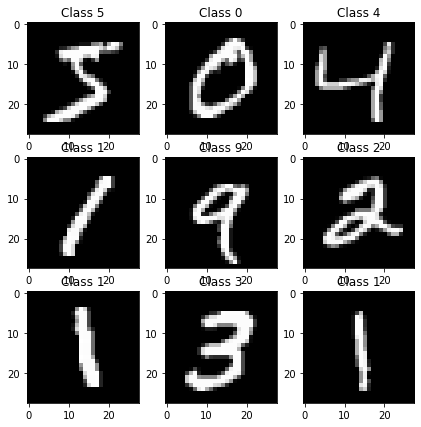

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Prepare the data for training

We scale the inputs to be in the range [0-1] rather than [0-255], but we keep the 28x28 pixels format. 

In [5]:
xmax=X_train.max()
X_train = X_train / xmax
X_test  = X_test  / xmax

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


## Building the neural network

We define a sequential model with three layers incrementally. 

In [12]:
from keras import layers

model = Sequential()

model.add( layers.Input((28,28,1)) )

model.add( layers.Conv2D(8, (3,3),  activation='relu') )
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Dropout(0.2))

model.add( layers.Conv2D(16, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Dropout(0.2))

model.add( layers.Flatten()) 
model.add( layers.Dense(100, activation='relu'))
model.add( layers.Dropout(0.5))

model.add( layers.Dense(10, activation='softmax'))

Display the contents of the model:  

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 16)         

Compilation of the model: 

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Train the model

In [15]:
batch_size  = 512
epochs      =  16

history = model.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (X_test, y_test))

Epoch 1/16
118/118 [==============================] - 6s 50ms/step - loss: 1.1277 - accuracy: 0.6273 - val_loss: 0.2845 - val_accuracy: 0.9233
Epoch 2/16
118/118 [==============================] - 6s 53ms/step - loss: 0.3867 - accuracy: 0.8791 - val_loss: 0.1499 - val_accuracy: 0.9545
Epoch 3/16
118/118 [==============================] - 6s 53ms/step - loss: 0.2702 - accuracy: 0.9176 - val_loss: 0.1081 - val_accuracy: 0.9670
Epoch 4/16
118/118 [==============================] - 7s 60ms/step - loss: 0.2177 - accuracy: 0.9345 - val_loss: 0.0874 - val_accuracy: 0.9732
Epoch 5/16
118/118 [==============================] - 7s 56ms/step - loss: 0.1912 - accuracy: 0.9423 - val_loss: 0.0747 - val_accuracy: 0.9765
Epoch 6/16
118/118 [==============================] - 7s 58ms/step - loss: 0.1748 - accuracy: 0.9471 - val_loss: 0.0687 - val_accuracy: 0.9775
Epoch 7/16
118/118 [==============================] - 7s 59ms/step - loss: 0.1585 - accuracy: 0.9519 - val_loss: 0.0622 - val_accuracy: 0.9793

## Evaluate performance 

In [16]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predict=model.predict(X_test) 
Ytest_predicted=np.argmax(predict,axis=1)
Y_test_pred = np_utils.to_categorical(Ytest_predicted, nb_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(Ytest_predicted == y_test)[0]
incorrect_indices = np.nonzero(Ytest_predicted != y_test)[0]

### Plot correctly or incorrectly classified examples

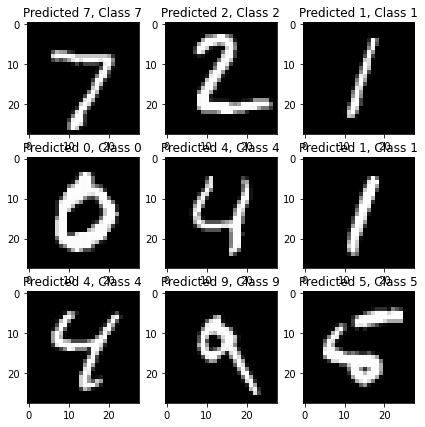

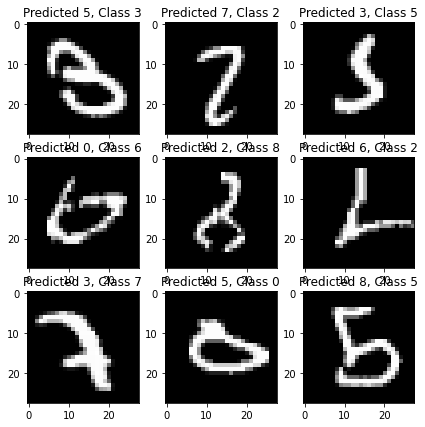

In [17]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(Ytest_predicted[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(Ytest_predicted[incorrect], y_test[incorrect]))

### Calculate the global accuracy and the error rate

### Model training history

In [19]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### ROC curve

In [32]:
from sklearn.metrics import roc_curve,auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(np_utils.to_categorical(y_test, nb_classes)[:, i], Y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


### Precision-Recall curve

In [35]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(nb_classes):
    precision[i], recall[i], _ = precision_recall_curve(np_utils.to_categorical(y_test, nb_classes)[:, i], Y_test_pred[:, i])


### Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#The input to confusion_matrix must be an array of int not one hot encodings
matrix = confusion_matrix(np_utils.to_categorical(y_test, nb_classes).argmax(axis=1), Y_test_pred.argmax(axis=1))